In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
pd.set_option("display.max_rows", 100)

ModuleNotFoundError: No module named 'plotly'

In [102]:
data = pd.read_csv('./COVID_NET/valid_df.csv')

In [103]:
data.columns

Index(['catchment', 'network', 'year', 'mmwr_year', 'mmwr_week',
       'age_category', 'sex', 'race', 'cumulative_rate', 'weekly_rate',
       'date'],
      dtype='object')

In [104]:
data.dtypes

catchment           object
network             object
year                 int64
mmwr_year            int64
mmwr_week            int64
age_category        object
sex                 object
race                object
cumulative_rate    float64
weekly_rate        float64
date                object
dtype: object

In [105]:
data

,catchment,network,year,mmwr_year,mmwr_week,age_category,sex,race,cumulative_rate,weekly_rate,date
0,Tennessee,EIP,2020,2020,10,Overall,Overall,Overall,0.1,0.1,2020-03-07
1,Utah,IHSP,2020,2020,10,Overall,Overall,White,0.0,0.0,2020-03-07
2,Utah,IHSP,2020,2020,10,Overall,Overall,Black,0.0,0.0,2020-03-07
3,Utah,IHSP,2020,2020,10,Overall,Overall,Hispanic/Latino,0.0,0.0,2020-03-07
4,Utah,IHSP,2020,2020,10,Overall,Overall,Asian/Pacific Islander,0.0,0.0,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...
14107,New Mexico,EIP,2020,2021,4,>= 18,Overall,Overall,544.3,9.0,2021-01-23
14108,New York,EIP,2020,2021,4,>= 18,Overall,Overall,454.6,10.2,2021-01-23
14109,Colorado,EIP,2020,2021,4,>= 18,Overall,Overall,549.9,7.3,2021-01-23
14110,Connecticut,EIP,2020,2021,4,>= 18,Overall,Overall,790.7,19.2,2021-01-23


In [106]:
# filter for all the valid rows for states (exclude 'Entire Network')
valid_df = data[pd.notnull(data['weekly_rate'])]
valid_df = valid_df.loc[valid_df['catchment'] != 'Entire Network']

# filter for all overall rows for states exclude entire network)
overall_df = valid_df.loc[(valid_df['age_category'] == 'Overall') &
                          (valid_df['sex'] == 'Overall') &
                          (valid_df['race'] == 'Overall')]

# filter based on sex for states
sex_df = valid_df.loc[(valid_df['age_category'] == 'Overall') &
                          (valid_df['sex'] != 'Overall') &
                          (valid_df['race'] == 'Overall')]


# filter based on race for states
race_df = valid_df.loc[(valid_df['age_category'] == 'Overall') &
                          (valid_df['sex'] == 'Overall') &
                          (valid_df['race'] != 'Overall')]


# filter based on age
age_df = valid_df.loc[(valid_df['age_category'] != 'Overall') &
                          (valid_df['sex'] == 'Overall') &
                          (valid_df['race'] == 'Overall')]


# generalize to five age group as it's shown on the website
age_df = age_df.loc[(age_df['age_category'] == '0-4 yr') |
                    (age_df['age_category'] == '5-17 yr') |
                    (age_df['age_category'] == '18-49 yr') |
                    (age_df['age_category'] == '50-64 yr') |
                    (age_df['age_category'] == '65+ yr')]


print(f'shape of rows with valid rate: {valid_df.shape}')
print(f'shape of overall_df: {overall_df.shape}')
print(f'shape of sex_df: {sex_df.shape}')
print(f'shape of race_df: {race_df.shape}')
print(f'shape of age_df: {age_df.shape}')

shape of rows with valid rate: (14112, 11)
shape of overall_df: (672, 11)
shape of sex_df: (1344, 11)
shape of race_df: (3360, 11)
shape of age_df: (3360, 11)


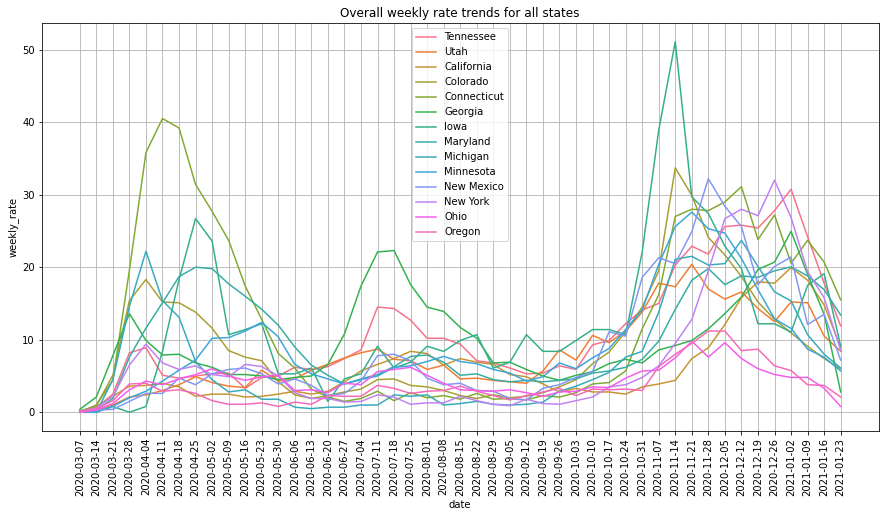

In [215]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states')
sns.lineplot(data=states_overall_df, x='date', y='weekly_rate', hue='catchment')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [108]:
summer = states_overall_df[states_overall_df['date']>='2020-06-01']
summer = summer[summer['date']<='2020-08-31']

fall = states_overall_df[states_overall_df['date']>='2020-09-01']
fall = fall[fall['date']<='2020-11-30']

spring = states_overall_df[states_overall_df['date']>='2020-03-07']
spring = spring[spring['date']<='2020-05-31'] 

winter = states_overall_df[states_overall_df['date']>='2020-12-01']
winter = winter[winter['date']<='2021-01-23'] 

seasons = [spring,summer,fall,winter]

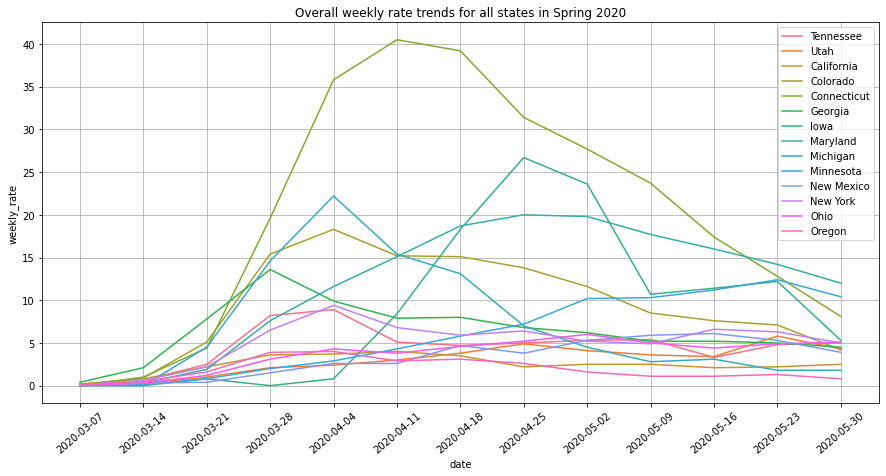

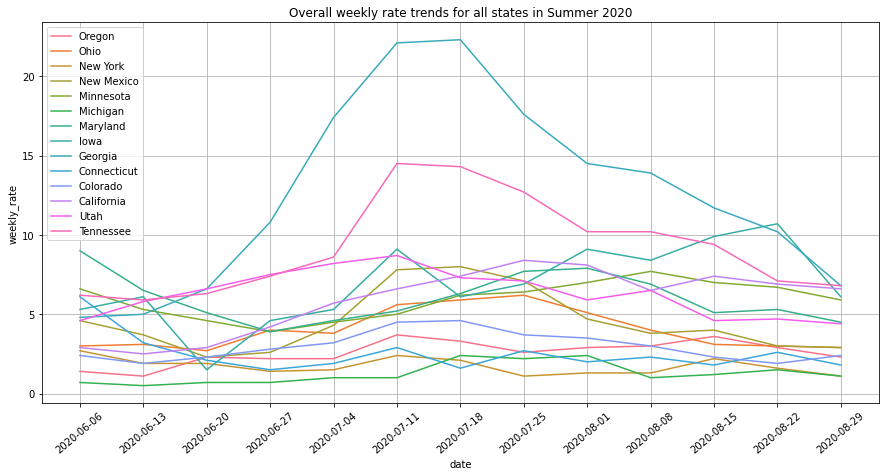

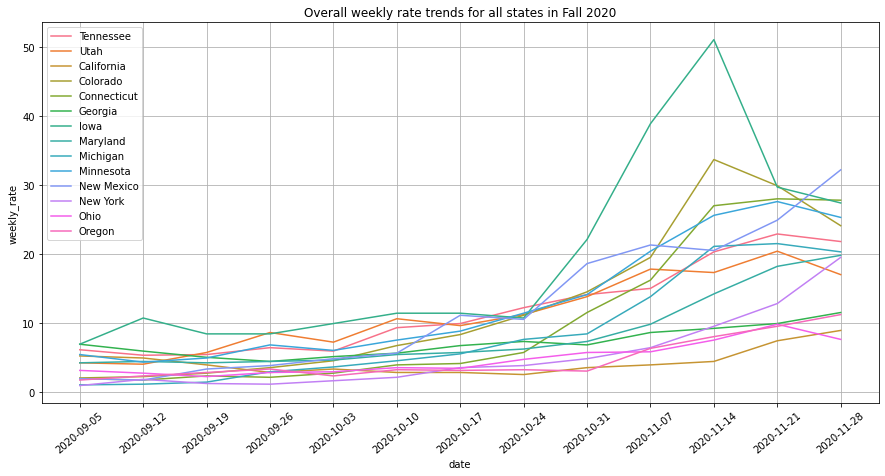

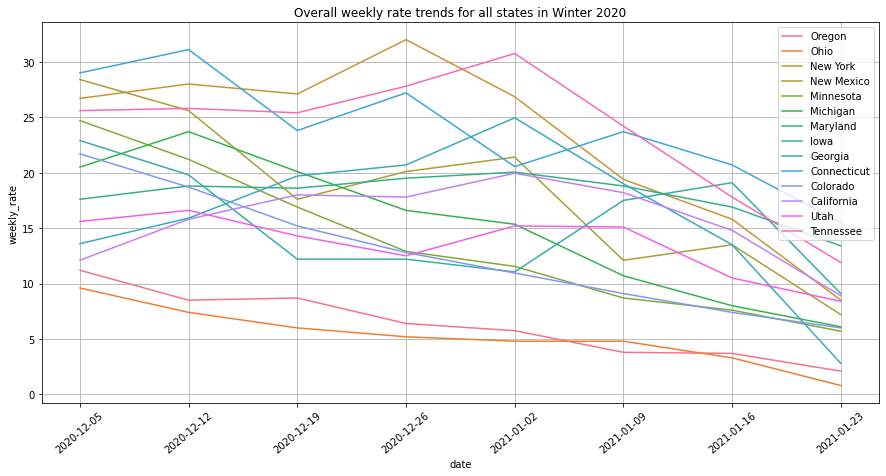

In [109]:
seasonNum = 1
for i in seasons:   
    plt.figure(figsize=(15,7))
    if seasonNum == 1:
        plt.title('Overall weekly rate trends for all states in Spring 2020')
    if seasonNum == 2:
        plt.title('Overall weekly rate trends for all states in Summer 2020')
    if seasonNum == 3:
        plt.title('Overall weekly rate trends for all states in Fall 2020')
    if seasonNum == 4:
        plt.title('Overall weekly rate trends for all states in Winter 2020')
    seasonNum = seasonNum + 1
    sns.lineplot(data=i, x='date', y='weekly_rate', hue='catchment')
    plt.legend(loc='best')
    plt.xticks(rotation=40)
    plt.grid()
    plt.show()

## It seems like generally in the summer, hospitalization rate is much lower compared to colder seasons like Winter or Spring

In [110]:
g = states_overall_df[states_overall_df['catchment']=='Iowa']
g = g[g['date']>='2020-11-14']
g.head(20)

,catchment,network,year,mmwr_year,mmwr_week,age_category,sex,race,cumulative_rate,weekly_rate,date
4083,Iowa,IHSP,2020,2020,46,Overall,Overall,Overall,397.0,51.1,2020-11-14
4204,Iowa,IHSP,2020,2020,47,Overall,Overall,Overall,426.7,29.7,2020-11-21
4307,Iowa,IHSP,2020,2020,48,Overall,Overall,Overall,454.2,27.4,2020-11-28
4428,Iowa,IHSP,2020,2020,49,Overall,Overall,Overall,477.0,22.9,2020-12-05
4531,Iowa,IHSP,2020,2020,50,Overall,Overall,Overall,496.8,19.8,2020-12-12
4652,Iowa,IHSP,2020,2020,51,Overall,Overall,Overall,509.0,12.2,2020-12-19
4755,Iowa,IHSP,2020,2020,52,Overall,Overall,Overall,521.2,12.2,2020-12-26
4876,Iowa,IHSP,2020,2020,53,Overall,Overall,Overall,532.7,11.4,2021-01-02
4979,Iowa,IHSP,2020,2021,1,Overall,Overall,Overall,543.3,10.7,2021-01-02
5100,Iowa,IHSP,2020,2021,2,Overall,Overall,Overall,560.9,17.5,2021-01-09


Reason for Connecticut Spike:
1. April: https://abc7ny.com/connecticut-coronavirus-news-update-health/6163286/
2. March: https://abc7ny.com/connecticut-coronavirus-2020-news-update-health/6100949/

Reasons for Iowa Spike:
1. Veteran's Day https://who13.com/news/veterans-day-drive-in-event-in-clarion/
2. Halloween: https://www.theperrychief.com/story/news/2020/10/23/covid-19-alters-halloween-plans-perry-and-surrounding-areas/5992633002/
3. Unusal Weather: https://www.forbes.com/sites/jimfoerster/2020/10/23/a-snow-squall-in-october-iowa-experiences-more-unusual-weather-for-2020/?sh=115617d9302f

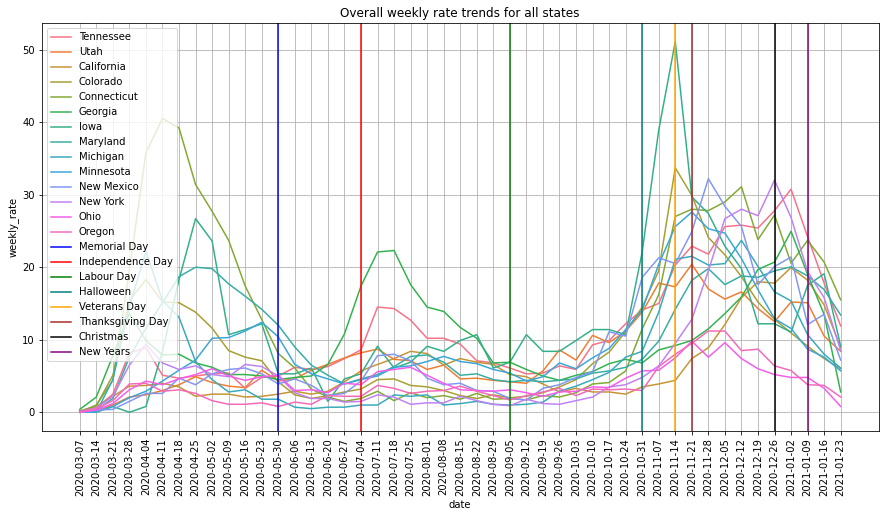

In [216]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states')
sns.lineplot(data=states_overall_df, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-05-30',label='Memorial Day',color='blue')
plt.axvline(x='2020-07-04',label='Independence Day',color = 'red')
plt.axvline(x='2020-09-05',label='Labour Day', color = 'green')
plt.axvline(x='2020-10-31',label='Halloween', color = 'teal')
#Nov 11
plt.axvline(x='2020-11-14',label='Veterans Day', color='orange')
#Close to boxing day
plt.axvline(x='2020-11-21',label='Thanksgiving Day',color ='brown')
plt.axvline(x='2020-12-26',label='Christmas',color='black')
plt.axvline(x='2021-01-09',label='New Years',color='purple')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Protests: https://mashable.com/article/ten-protest-moments-2020/

### Effects from BLM Protests

Black Lives Matter Protest:
1. Alabama May 31
2. Alaska May 30
4. Arizona June May 28
5. Arkansas May 30
6. California May 30 As of June 15, protests have occured in 171 cities in California
7. Colorado May 28 
8. Connecticut May 29
9. Delaware May 31 
10. Columbia District May 29
11. Florida May 31
12. Georgia May 31 
...

Generally, the protests starts on May 28 

In [112]:
BLM = states_overall_df[states_overall_df['date']>='2020-05-10']
BLM = BLM[BLM['date']<='2020-10-30']

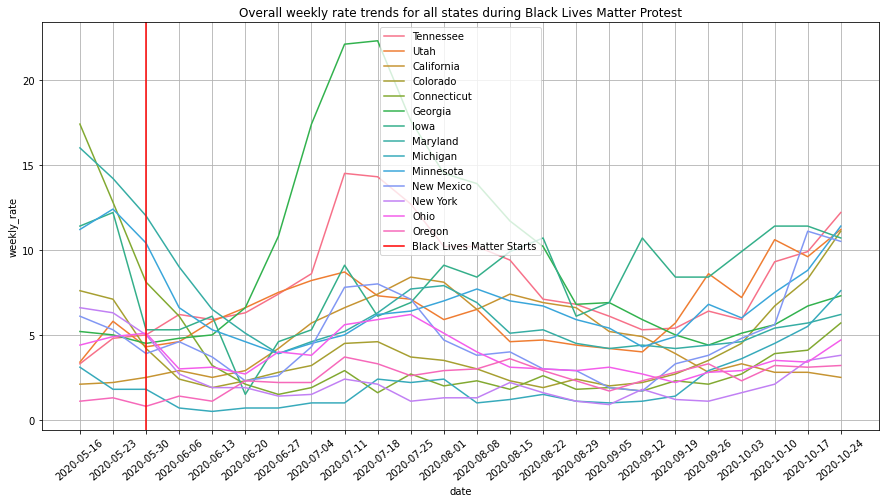

In [218]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Black Lives Matter Protest')
sns.lineplot(data=BLM, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-05-30',label='Black Lives Matter Starts',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

It seems like Black Lives Matter did have an impact on the hosptialization rate but it was very small. According to this paper, https://www.nber.org/papers/w27408, it states that, BLM did not have an impact at all.

### Effects from In Person Voting

In [114]:
inPersonVoting = states_overall_df[states_overall_df['date']>='2020-09-01']
inPersonVoting = inPersonVoting[inPersonVoting['date']<='2020-11-30']

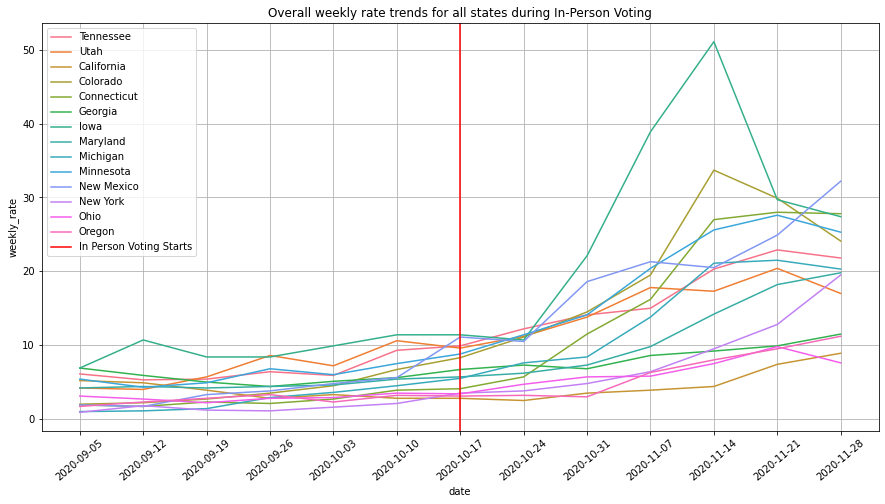

In [115]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during In-Person Voting')
sns.lineplot(data=inPersonVoting, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-10-17',label='In Person Voting Starts',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

On October 17,2020 massive lines started forming in early voting for Georgia https://www.cnn.com/2020/10/12/politics/georgia-early-voting-lines-election-2020/index.html, polls closed on Oct 23rd. This could be a possible reason for the spike after two weeks. https://sos.ga.gov/index.php/elections/record_breaking_early_in-person_voting_continues_october_17_9_pm_update

### Effects from Election Protests

In [116]:
electionProtests = states_overall_df[states_overall_df['date']>='2020-11-01']
electionProtests = electionProtests[electionProtests['date']<='2021-01-23']

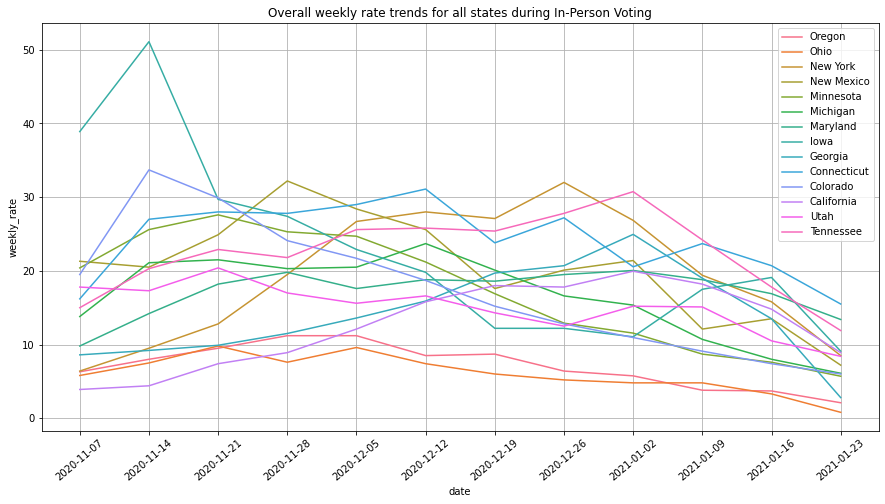

In [117]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during In-Person Voting')
sns.lineplot(data=electionProtests, x='date', y='weekly_rate', hue='catchment')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

One possible reasoning for the graph to be going sideways is due to election protests happening: https://en.wikipedia.org/wiki/2020%E2%80%9321_United_States_election_protests

### Effectis from Anti-lockdown protests

In [118]:
antilockProtest = states_overall_df[states_overall_df['date']>='2020-04-01']
antilockProtest = antilockProtest[antilockProtest['date']<='2020-07-01']

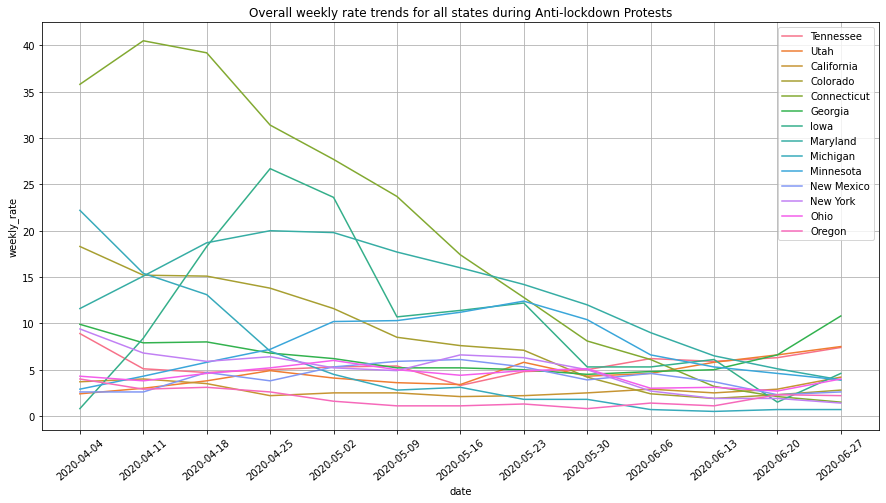

In [119]:
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=antilockProtest, x='date', y='weekly_rate', hue='catchment')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Utah:https://www.deseret.com/utah/2020/4/18/21226583/business-revival-rally-coronavirus-pandemic-covid-19-salt-lake-washington-square

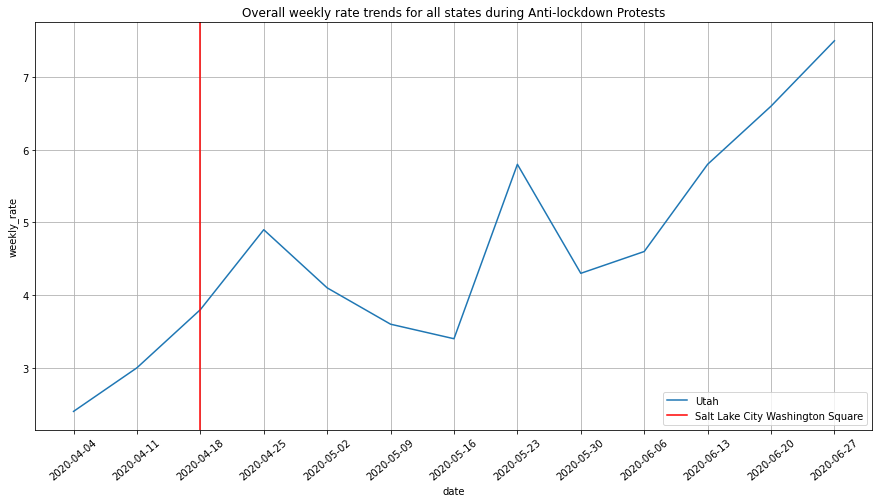

In [120]:
utah = antilockProtest[antilockProtest['catchment']=='Utah']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=utah, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='Salt Lake City Washington Square',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

California: https://www.kpbs.org/news/2020/apr/18/protesters-us-san-diego-coronavirus-stay-at-home/

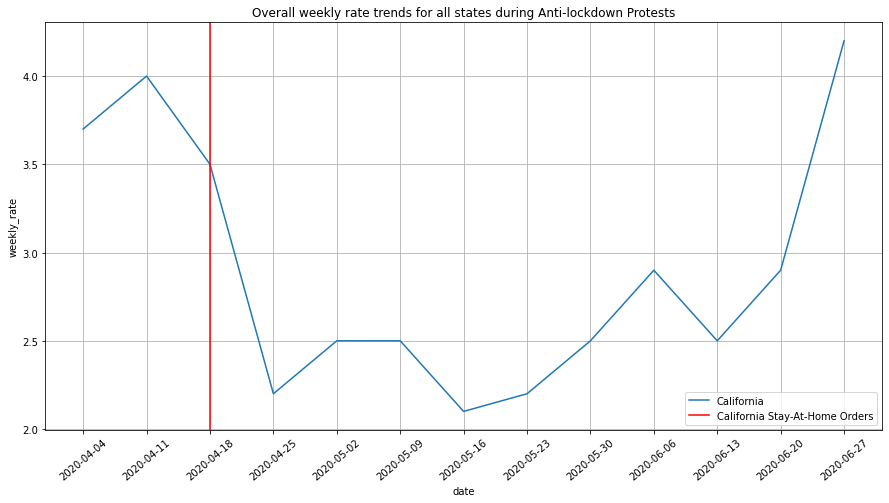

In [121]:
cali = antilockProtest[antilockProtest['catchment']=='California']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=cali, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='California Stay-At-Home Orders',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Connecticut: https://www.courant.com/coronavirus/hc-news-coronavirus-rally-for-reopening-20200420-bjs5dwhhtrfo5n473xe35cmu54-story.html

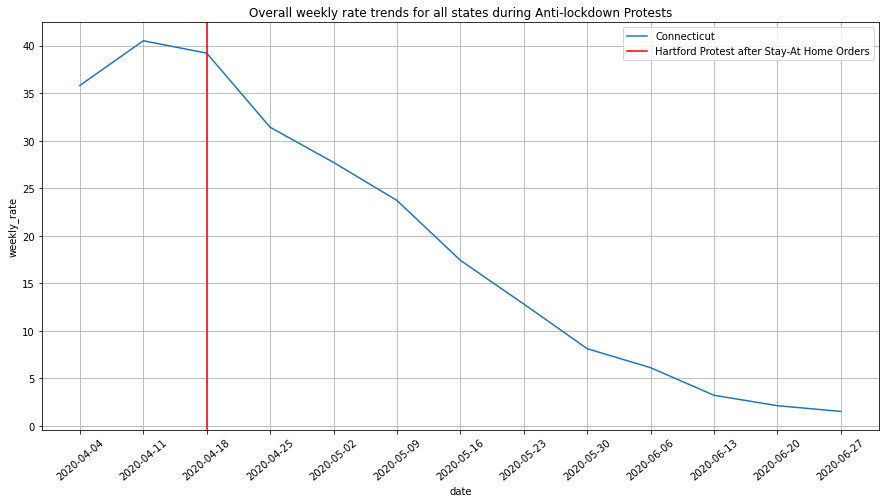

In [122]:
connect = antilockProtest[antilockProtest['catchment']=='Connecticut']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=connect, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='Hartford Protest after Stay-At Home Orders',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Maryland: Driving Protest after Excessive Quarantine
https://www.wusa9.com/article/news/local/maryland/maryland-group-protests-to-reopen-state/65-eabb583d-d45e-40c9-835f-22f8dd9cf28f

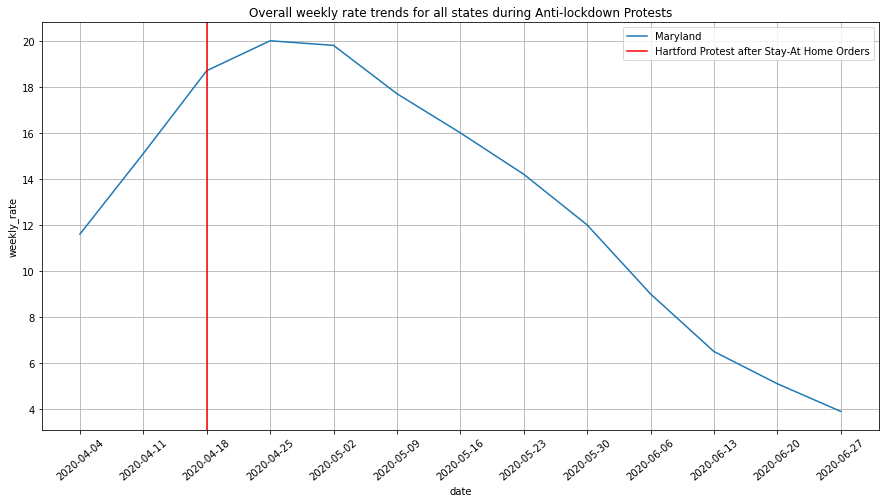

In [123]:
maryl = antilockProtest[antilockProtest['catchment']=='Maryland']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=maryl, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='Hartford Protest after Stay-At Home Orders',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Michigan: Largest Reopen Portest Operations Gridlock April 15 https://www.freep.com/story/news/local/michigan/2020/04/15/lansing-capitol-protest-michigan-stay-home-order/5136842002/ (everyone in their cars), Armed Protest https://www.bbc.com/news/world-us-canada-52496514, Armed Protest 2 https://www.npr.org/2020/05/14/855918852/heavily-armed-protesters-gather-again-at-michigans-capitol-denouncing-home-order

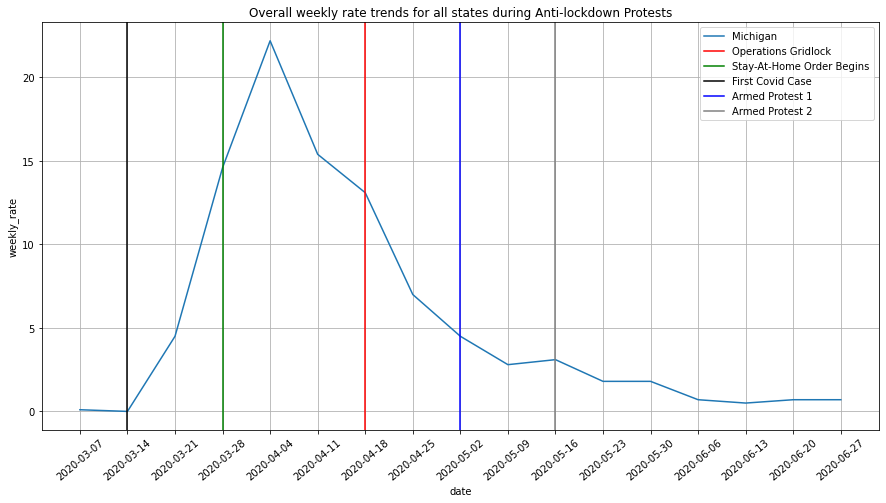

In [124]:
michigan = states_overall_df[states_overall_df['date']>='2020-03-01']
michigan = michigan[michigan['date']<='2020-07-01']
michigan = michigan[michigan['catchment']=='Michigan']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=michigan, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='Operations Gridlock',color = 'red')
plt.axvline(x='2020-03-28',label='Stay-At-Home Order Begins',color = 'green')
plt.axvline(x='2020-03-14',label='First Covid Case',color = 'black')
plt.axvline(x='2020-05-02',label='Armed Protest 1',color = 'blue')
plt.axvline(x='2020-05-16',label='Armed Protest 2',color = 'grey')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Ohio
1. protest at April 9
2. Second protest 200-300 people april 14 https://www.clevescene.com/scene-and-heard/archives/2020/04/14/were-not-afraid-of-any-virus-crowds-gathered-outside-of-ohio-statehouse-protesting-coronavirus-shutdowns

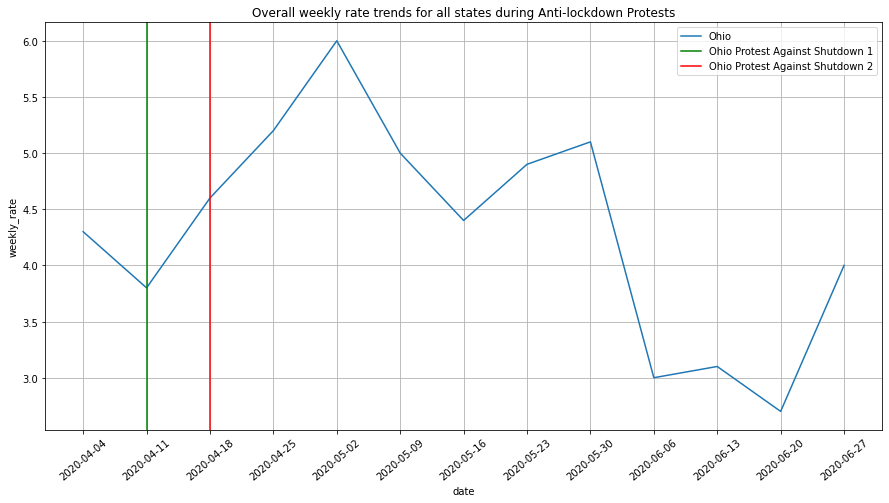

In [125]:
ohio = antilockProtest[antilockProtest['catchment']=='Ohio']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=ohio, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-11',label='Ohio Protest Against Shutdown 1',color = 'green')
plt.axvline(x='2020-04-18',label='Ohio Protest Against Shutdown 2',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

Oregon: https://ktvz.com/news/2020/04/17/protest-planned-in-redmond-against-stay-at-home-order/

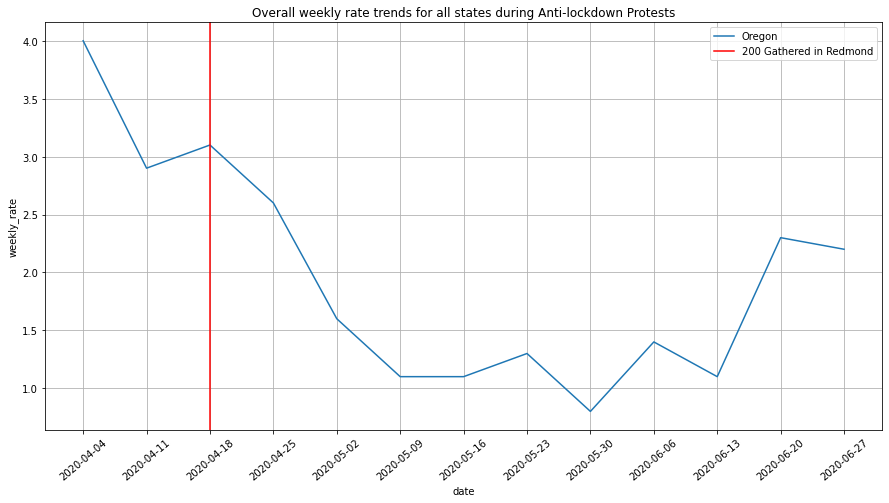

In [126]:
oregon = antilockProtest[antilockProtest['catchment']=='Oregon']
states_overall_df = overall_df.loc[overall_df['catchment'] != 'Entire Network']
plt.figure(figsize=(15,7.5))
plt.title('Overall weekly rate trends for all states during Anti-lockdown Protests')
sns.lineplot(data=oregon, x='date', y='weekly_rate', hue='catchment')
plt.axvline(x='2020-04-18',label='200 Gathered in Redmond',color = 'red')
plt.legend(loc='best')
plt.xticks(rotation=40)
plt.grid()
plt.show()

In [185]:
gdp = pd.read_csv('gdpbystate.csv')

In [186]:
statesgdp = gdp[gdp['catchment'].isin(['Tennessee','Utah','California','Colorado',
                                     'Connecticut','Georgia','Iowa','Maryland',
                                    'Michigan','Minnesota','New Mexico','New York',
                                    'Ohio','Oregon'])]
statesgdp = statesgdp.sort_values(['gdp_2019'] ,ascending=False)
statesgdp = statesgdp[['catchment','gdp_2019']]
print(statesgdp.shape)
print(statesgdp.dtypes)
statesgdp

(14, 2)
catchment     object
gdp_2019     float64
dtype: object


,catchment,gdp_2019
5,California,3132800.6
33,New York,1772260.7
36,Ohio,695361.6
11,Georgia,625713.6
23,Michigan,536888.3
21,Maryland,426747.4
6,Colorado,392986.0
24,Minnesota,383777.0
43,Tennessee,376582.4
7,Connecticut,287822.2


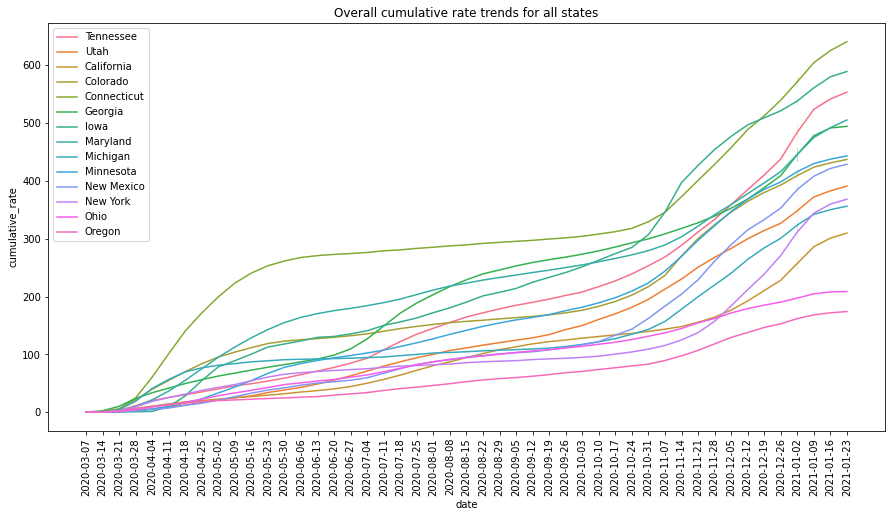

In [187]:
plt.figure(figsize=(15,7.5))
plt.title('Overall cumulative rate trends for all states')
sns.lineplot(data=states_overall_df, x='date', y='cumulative_rate', hue='catchment')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

In [201]:
current = states_overall_df[states_overall_df['date']=='2021-01-23']
current = current[['catchment','cumulative_rate']]
print(current.shape)
current.dtypes

(14, 2)


catchment           object
cumulative_rate    float64
dtype: object

In [202]:
gdpCumulativeRate = statesgdp.merge(current)
gdpCumulativeRate = gdpCumulativeRate.sort_values(['gdp_2019'] ,ascending=False)
gdpCumulativeRate

,catchment,gdp_2019,cumulative_rate
0,California,3132800.6,309.9
1,New York,1772260.7,368.3
2,Ohio,695361.6,208.8
3,Georgia,625713.6,494.3
4,Michigan,536888.3,356.3
5,Maryland,426747.4,505.3
6,Colorado,392986.0,437.1
7,Minnesota,383777.0,443.2
8,Tennessee,376582.4,553.4
9,Connecticut,287822.2,640.7


Text(0.5, 1.0, 'Correlation Between GDP and Cumulative Hospitalization Rate')

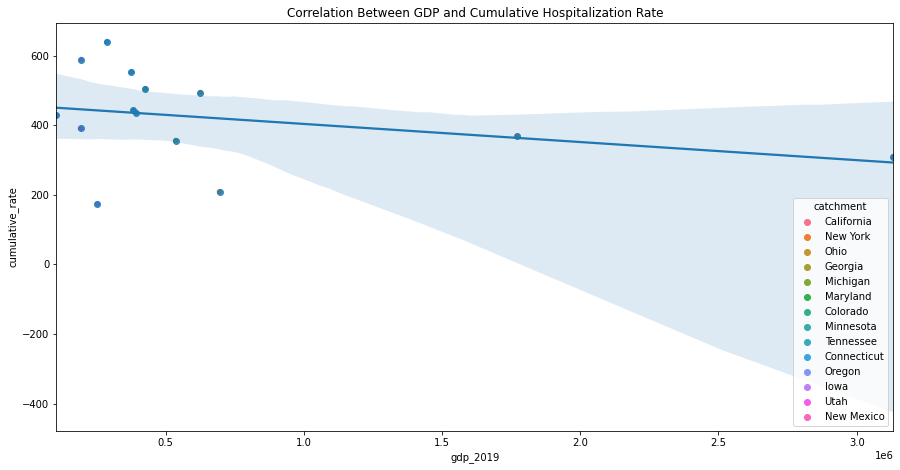

In [214]:
plt.figure(figsize=(15,7.5))
sns.scatterplot(data=gdpCumulativeRate, x='gdp_2019', y='cumulative_rate', hue='catchment')
sns.regplot(x=gdpCumulativeRate['gdp_2019'],y=gdpCumulativeRate['cumulative_rate'])
plt.title('Correlation Between GDP and Cumulative Hospitalization Rate')